## Principal Component Analysis

Principal component analysis is a technique for feature extraction — so it
combines our input variables in a specific way, then we can drop the “least
important” variables while still retaining the most valuable parts of all of the
variables!
As an added benefit, each of the “new” variables after PCA are all
independent of one another.
PCA achieves this goal by projecting data onto a lower-dimensional
subspace that retains most of the variability among data.

There are a few things to keep in mind when applying PCA:
PCA only works with numeric features, like continuous quantities or counts.
PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
Consider removing or constraining outliers, since they can have an undue influence on the results.

Orthogonal transformation to convert a set of observations of possibly correlated
variables into a set of values of linearly uncorrelated variables called principal
components.

This transformation is defined in such a way that the first principal component
has the largest possible variance (i.e.; it accounts for as much of the variability
in the data as possible), and each succeeding component in turn has the
highest variance possible under the constraint that it is orthogonal to the
preceding components.

The resulting vectors form an uncorrelated orthogonal basis set

- We calculate the largest eigenvalue 𝜆1 and the corresponding eigenvector 𝒗1 of the covariance matrix C, as the direction of the largest variance in the dataset
- Each succeeding component 𝒗* must follow the direction of the next largest possible
variance under the constraint that it is orthogonal to (i.e., uncorrelated with) the
preceding components
- 𝑣1 describes most of the variability in the data, 𝑣2 adds the next big contribution, and so
on. In the end, the last 𝑣+ do not bring much more information to describe the data.

### Application

In [1]:
data(iris)

In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Iris dataset has 3 classes (setosa,verticolor and virginica) and 4 features (sepal length and width, petal length and width).

### Summary of the Approach
- Standardize data
- Obtain eigenvectors and eigenvalues from the covariance matrix or correlation matrix
- Sort eigenvalues in desc order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace
- Construct the projection matrix W from the selected k eigenvectors
- Transform the original dataset X via W to obtain a k-dimensional feature subspace Y


### Visualizing the dataset

In [10]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [24]:
library(ggplot2)

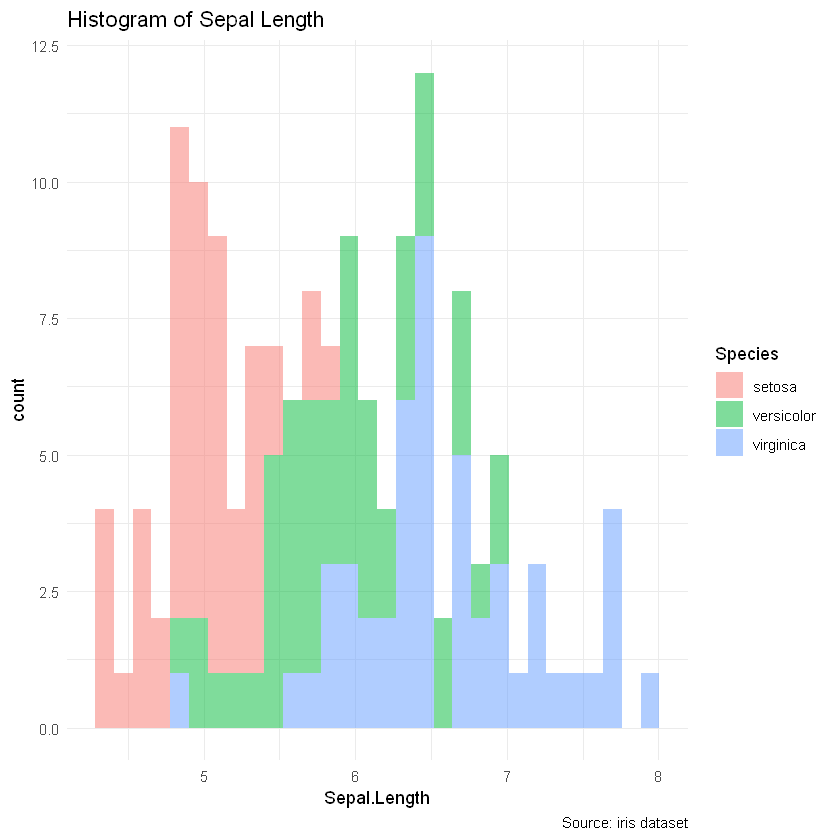

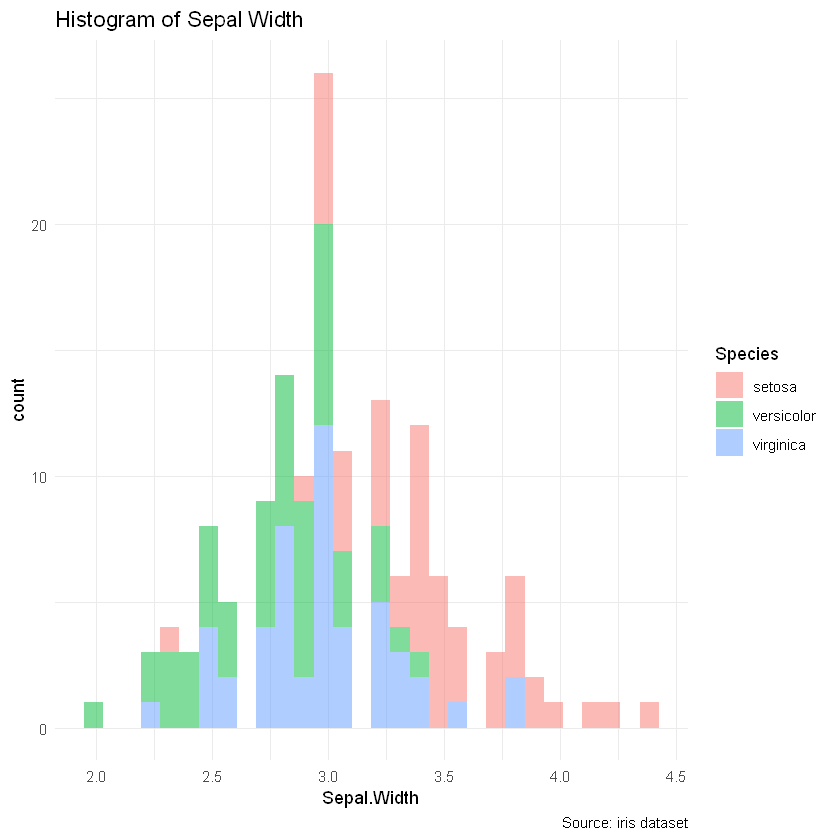

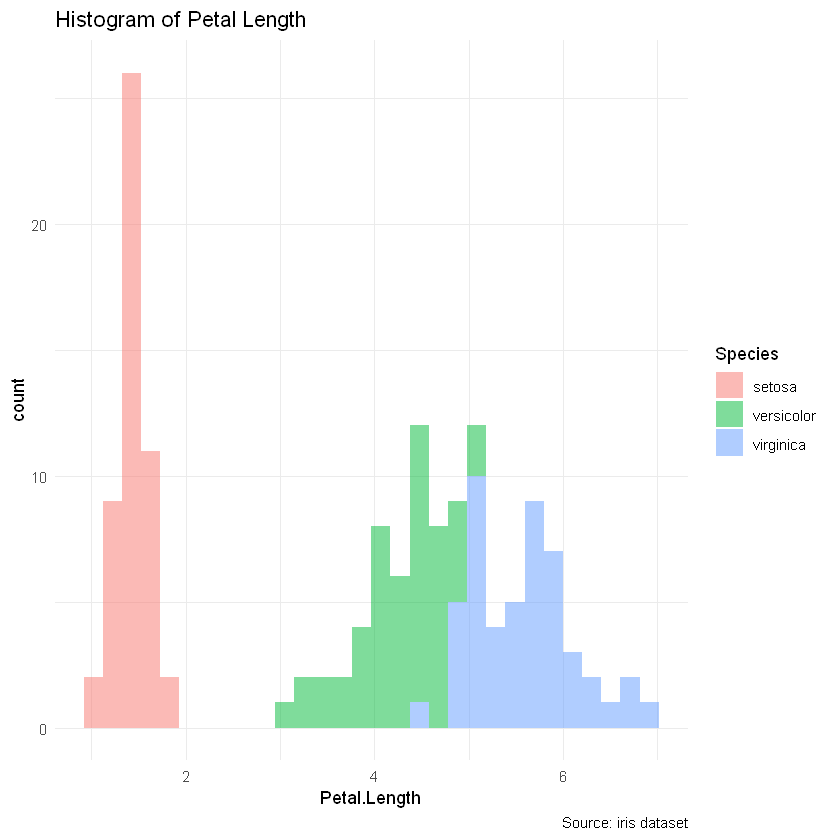

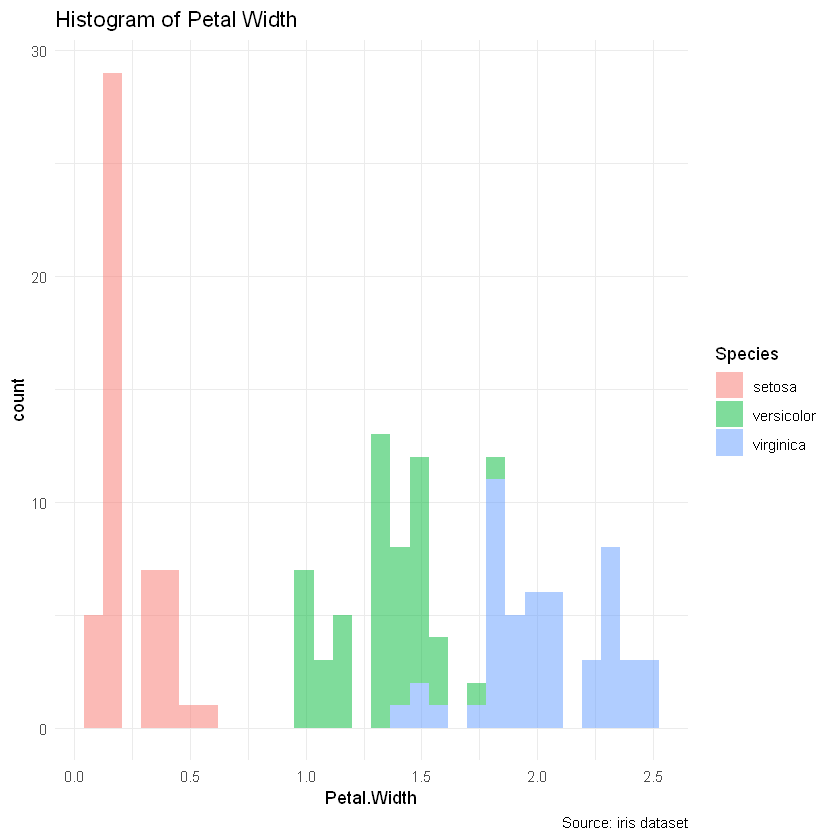

In [48]:
ggplot(iris) + geom_histogram(aes(x = Sepal.Length, fill = Species), alpha = 0.5, bins = 30) + labs(title="Histogram of Sepal Length", caption = "Source: iris dataset") + theme_minimal()
ggplot(iris) + geom_histogram(aes(x = Sepal.Width, fill = Species), alpha = 0.5, bins = 30)+ labs(title="Histogram of Sepal Width", caption = "Source: iris dataset") + theme_minimal()
ggplot(iris) + geom_histogram(aes(x = Petal.Length, fill = Species), alpha = 0.5, bins = 30)+ labs(title="Histogram of Petal Length", caption = "Source: iris dataset") + theme_minimal()
ggplot(iris) + geom_histogram(aes(x = Petal.Width, fill = Species), alpha = 0.5, bins = 30)+ labs(title="Histogram of Petal Width", caption = "Source: iris dataset") + theme_minimal()



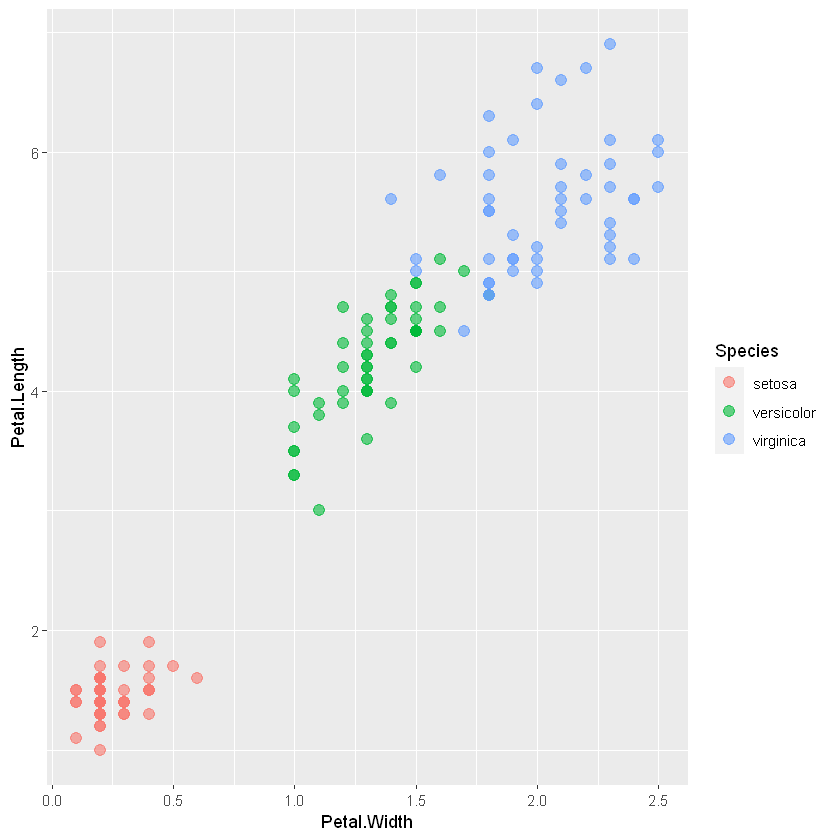

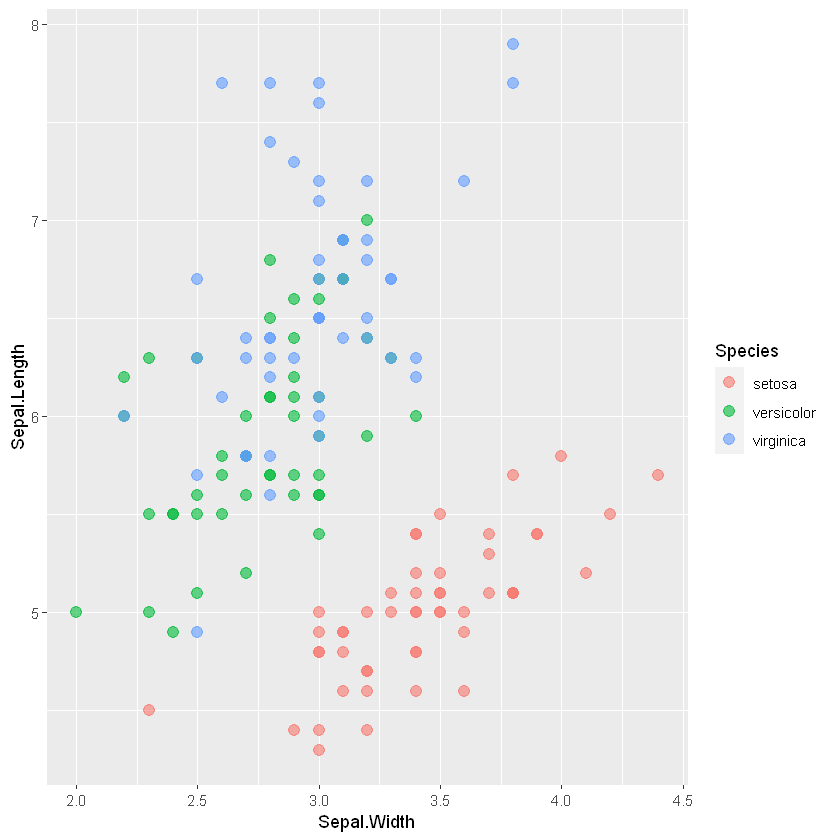

In [233]:
ggplot(iris) + geom_point(aes(x = Petal.Width, y = Petal.Length, colour = Species), alpha = 0.6, size = 3)
ggplot(iris) + geom_point(aes(x = Sepal.Width, y = Sepal.Length, colour = Species), alpha = 0.6, size = 3)

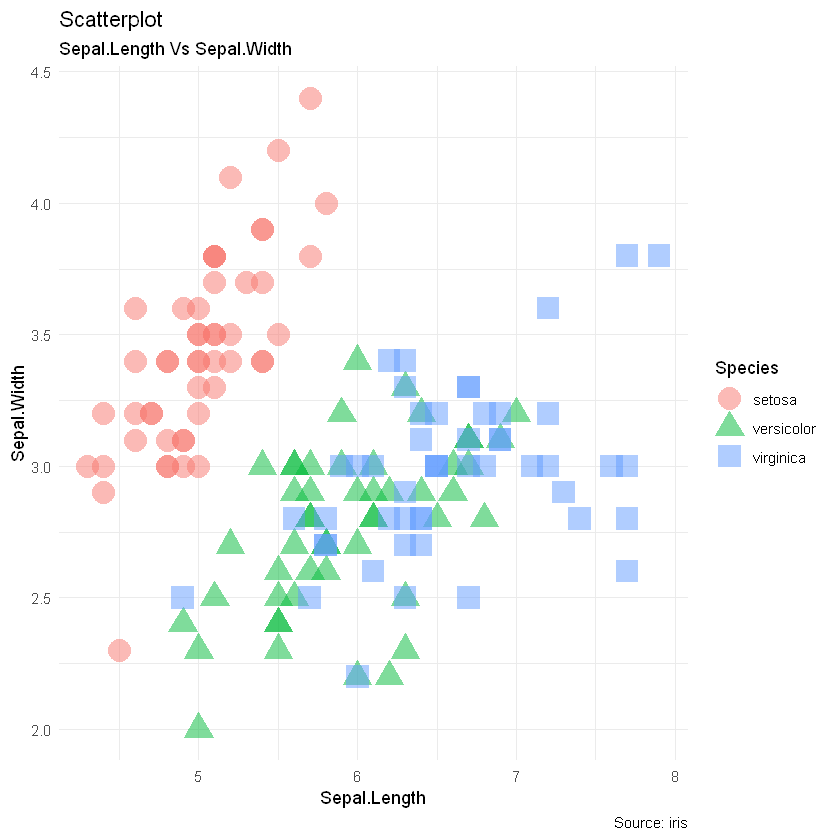

In [52]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, colour = Species, shape = Species)) + geom_point(alpha = 0.5, size=6) + theme_minimal() + labs(subtitle="Sepal.Length Vs Sepal.Width", y="Sepal.Width", x="Sepal.Length", title="Scatterplot", caption = "Source: iris") + theme_minimal()


Although, all features in the Iris dataset were measured in centimeters, let us continue with
the transformation of the data onto unit scale (mean=0 and variance=1), which is a
requirement for the optimal performance of many machine learning algorithms.

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the
"core" of a PCA: The eigenvectors (principal components) determine the directions of the
new feature space, and the eigenvalues determine their magnitude. In other words, the
eigenvalues explain the variance of the data along the new feature axes.

The typical goal of a PCA is to reduce the dimensionality of the original feature space by
projecting it onto a smaller subspace, where the eigenvectors will form the axes.
In order to decide which eigenvector(s) can be dropped without losing too much
information for the construction of lower-dimensional subspace, we need to inspect the
corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least
information about the distribution of the data; those are the ones can be dropped.

### Computing the Covariance (Correlation) Matrix

The eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

In [65]:
iris_stripped <- iris[,-5]

In [73]:
iris_scaled <- scale(iris_stripped, center = TRUE, scale = TRUE)

In [79]:
iris_cov<-cov(iris_scaled)
iris_cov

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


### Computing the Eigenvectors (Principal Components)

In [90]:
ev<-eigen(iris_cov)

vectors<-ev$vector
vectors

0.5210659,-0.37741762,0.7195664,0.2612863
-0.2693474,-0.92329566,-0.2443818,-0.1235096
0.5804131,-0.02449161,-0.1421264,-0.8014492
0.5648565,-0.06694199,-0.6342727,0.5235971


### Computing the Eigenvalues

In [91]:
values<-ev$values
values

[1] 2.91849782 0.91403047 0.14675688 0.02071484

The typical goal of a PCA is to reduce the dimensionality of the original feature space by
projecting it onto a smaller subspace, where the eigenvectors will form the axes.
In order to decide which eigenvector(s) can be dropped without losing too much
information for the construction of lower-dimensional subspace, we need to inspect the
corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least
information about the distribution of the data; those are the ones can be dropped.

### Explained Variance

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [93]:
tot_value<-sum(values)
tot_value

[1] 4

[1] "72.96%" "22.85%" "3.67%"  "0.52%" 


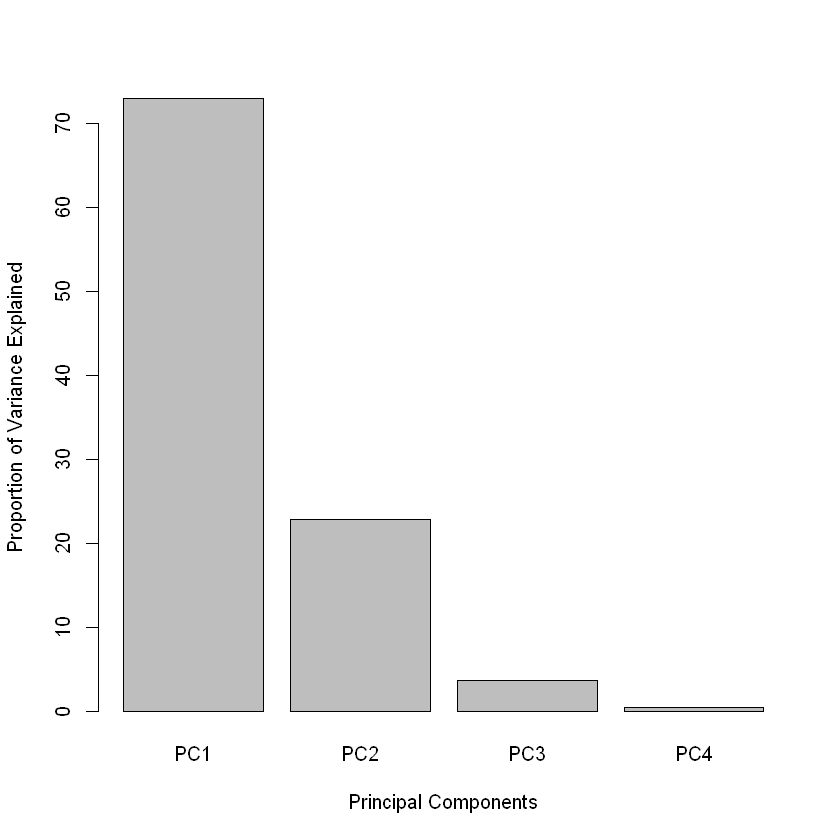

In [138]:
prop_var<-round((values/tot_value)*100,2)
print(paste0(prop_var,"%"))

barplot(prop_var,
       xlab = "Principal Components",
       ylab = "Proportion of Variance Explained",
       names.arg = c("PC1", "PC2", "PC3", "PC4"))

[1] "72.96%" "95.81%" "99.48%" "100%"  


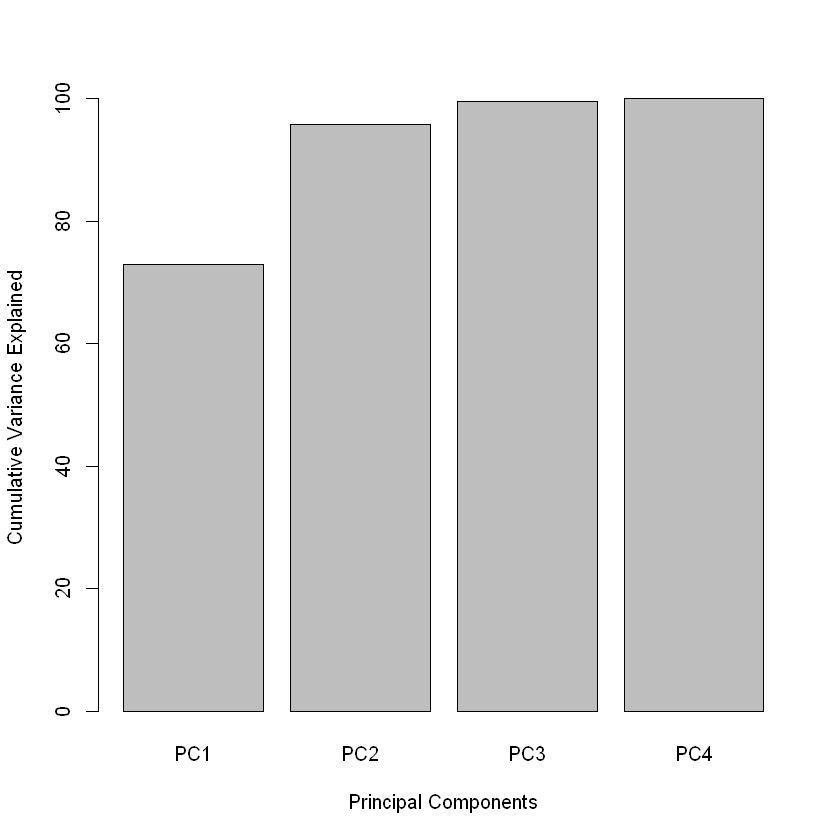

In [137]:
cum_var<-c(prop_var[[1]],prop_var[[2]]+prop_var[[1]],prop_var[[3]]+prop_var[[2]]+prop_var[[1]],prop_var[[4]]+prop_var[[3]]+prop_var[[2]]+prop_var[[1]])
print(paste0(cum_var,"%"))

barplot(cum_var,
       xlab = "Principal Components",
       ylab = "Cumulative Variance Explained",
       names.arg = c("PC1", "PC2", "PC3", "PC4"))

In [135]:
rbind(prop_var,cum_var)

prop_var,73,23,4,0.5
cum_var,73,96,99,100.0


We can see that most of the variance can be explained by the first component alone by ~73%. The second brings some information of around 23%. While the third and fourth components can be safely dropped without losing much information. Together the two components contain ~96% of the information.

### Projection Matrix

The projection matrix will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [168]:
vectors[,1]
vectors[,2]
matrix_w<-t(rbind(vectors[,1],vectors[,2]))
matrix_w

[1]  0.5210659 -0.2693474  0.5804131  0.5648565

[1] -0.37741762 -0.92329566 -0.02449161 -0.06694199

0.5210659,-0.37741762
-0.2693474,-0.92329566
0.5804131,-0.02449161
0.5648565,-0.06694199


In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the
new subspace via the equation 𝑌 = 𝑆×𝑊, where S is the standardized original data set (150x4) and
Y is a 150×2 matrix of our transformed samples.

In [231]:
Y<-data.frame(iris_scaled %*% matrix_w) # the %*% operator produces the dot product of S150x4 and W4x2 matrices. 
Y_labeled<-cbind(Y,iris$Species)
Y_labeled<-data.frame("PC1"=Y_labeled$X1,"PC2"=Y_labeled$X2,"Species"=iris$Species)
head(Y_labeled)

,PC1,PC2,Species
,<dbl>,<dbl>,<fct>
1,-2.257141,-0.4784238,setosa
2,-2.074013,0.6718827,setosa
3,-2.356335,0.3407664,setosa
4,-2.291707,0.5953999,setosa
5,-2.381863,-0.6446757,setosa
6,-2.068701,-1.4842053,setosa


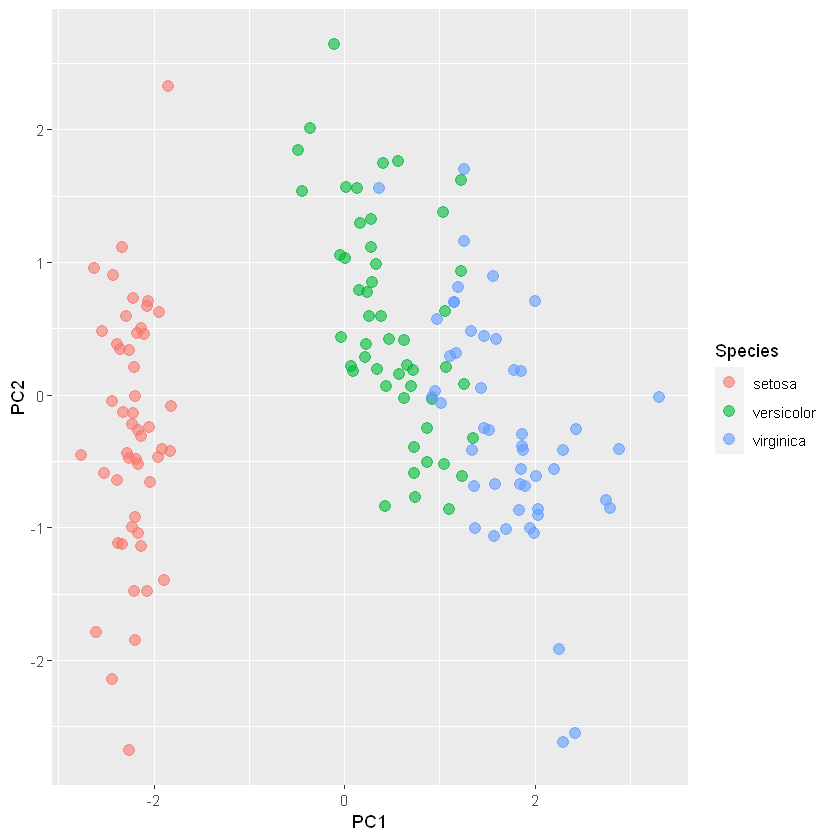

In [232]:
ggplot(Y_labeled) + geom_point(aes(x = PC1, y = PC2, colour = Species), alpha = 0.6, size = 3)

Source: https://apsl.tech/en/blog/using-principal-component-analysis-pac-data-explore-step-step/

### Principal Component Analysis using Prcomp() 

In [66]:
iris.pca <- prcomp(iris_stripped, center= TRUE, scale= TRUE)

In [68]:
summary(iris.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

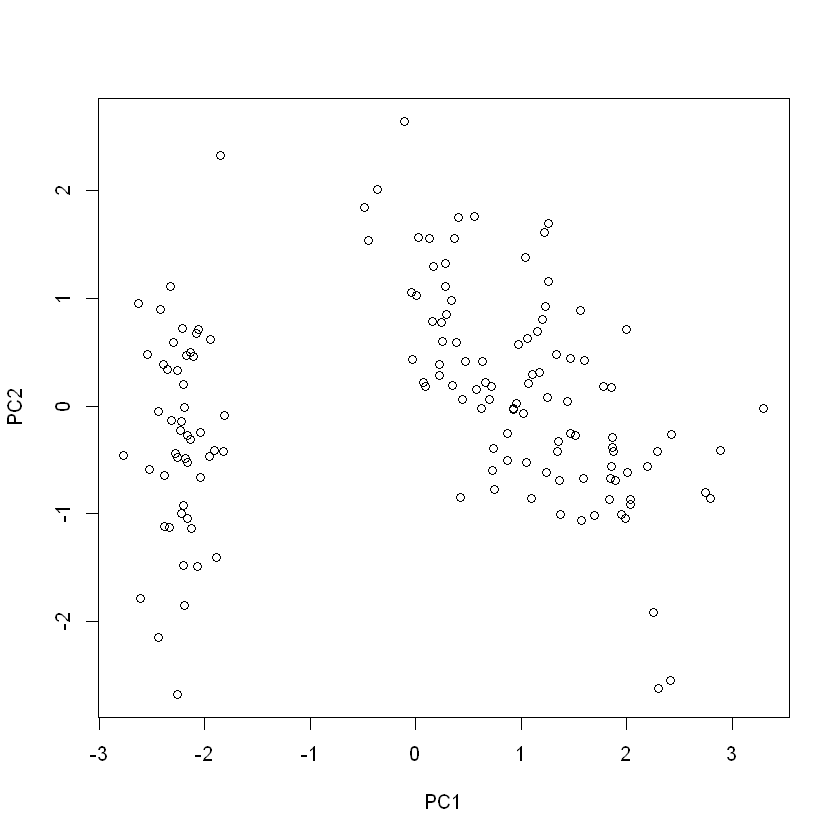

In [454]:
plot(predict(iris.pca))

### The Digits dataset

The digits dataset is a set of handwritten digits matrix images used in optical recognition tasks. You may read all about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

Each image in the training set is defined by a collection of 64 pixel values, which we will call the vector x:
x=[x1,x2,x3⋯x64]

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

image(x)=x1⋅(pixel 1)+x2⋅(pixel 2)+x3⋅(pixel 3)⋯x64⋅(pixel 64)

[...]

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with the least amount of components.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

From https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


In [535]:
digits<-data.matrix(read.csv("digits.csv")) #download and import sklearn's dataset digits from sklearn's github
head(digits)
digits_stripped<-digits[,-65]

X0,X0.1,X5,X13,X9,X1,X0.2,X0.3,X0.4,X0.5,⋯,X0.23,X0.24,X0.25,X6,X13.2,X10.2,X0.26,X0.27,X0.28,X0.29
0,0,0,12,13,5,0,0,0,0,⋯,0,0,0,0,11,16,10,0,0,1
0,0,0,4,15,12,0,0,0,0,⋯,0,0,0,0,3,11,16,9,0,2
0,0,7,15,13,1,0,0,0,8,⋯,0,0,0,7,13,13,9,0,0,3
0,0,0,1,11,0,0,0,0,0,⋯,0,0,0,0,2,16,4,0,0,4
0,0,12,10,0,0,0,0,0,0,⋯,0,0,0,9,16,16,10,0,0,5
0,0,0,12,13,0,0,0,0,0,⋯,0,0,0,1,9,15,11,3,0,6


In [285]:
digits.pca<-prcomp(digits_stripped)
digits.pca_2<-prcomp(digits_stripped,rank.=2)

In [257]:
summary(digits.pca_2)

Importance of first k=2 (out of 64) components:
                          PC1    PC2
Standard deviation     13.383 12.789
Proportion of Variance  0.149  0.136
Cumulative Proportion   0.149  0.285

In [259]:
head(digits.pca_2$x)

PC1,PC2
7.934471,-20.702957
6.980442,-9.918805
-15.906778,3.441473
23.310001,4.256566
-14.081495,7.969126
21.364439,5.371990


In [277]:
digits.df<-data.frame(cbind(digits.pca_2$x,"Digit"=digits$X0.29))
head(digits.df)

,PC1,PC2,Digit
,<dbl>,<dbl>,<dbl>
1,7.934471,-20.702957,1
2,6.980442,-9.918805,2
3,-15.906778,3.441473,3
4,23.310001,4.256566,4
5,-14.081495,7.969126,5
6,21.364439,5.371990,6


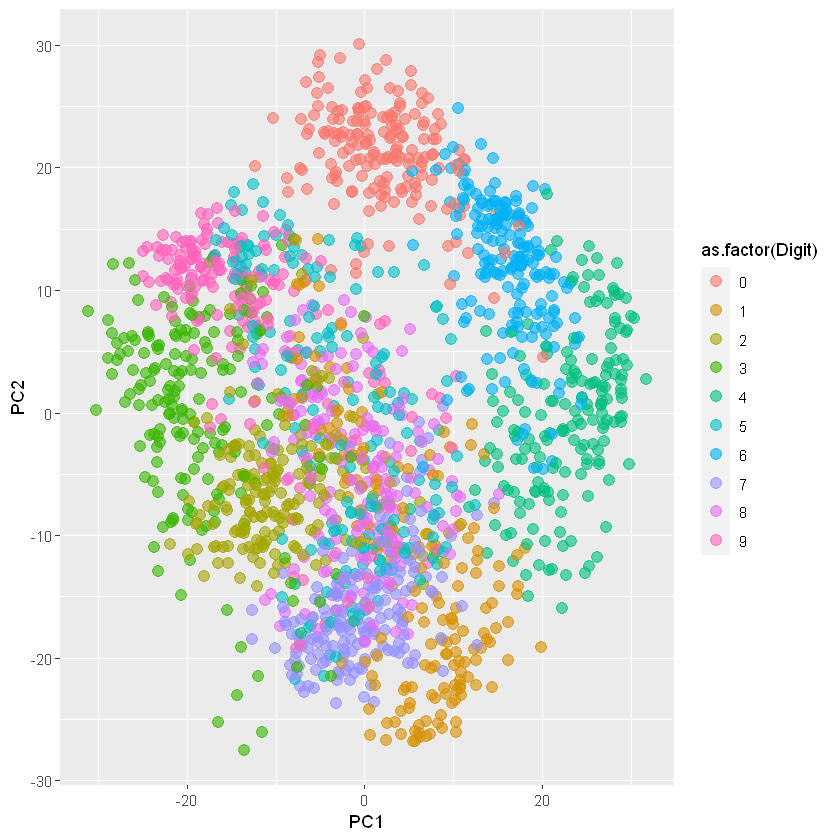

In [279]:
ggplot(digits.df) + geom_point(aes(x = PC1, y = PC2,colour=as.factor(Digit)), alpha = 0.6, size = 3)

In [295]:
pca.sum<-summary(digits.pca)
pca.sum$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Standard deviation,13.38304,12.78898,11.90870,10.05296,8.338077,7.688332,7.204686,6.635961,6.350847,6.084822,⋯,0.1992159,0.1223065,0.09207455,0.06021359,0.03574527,0.0257223,0.02030892,1.007211e-15,1.007211e-15,9.949295e-16
Proportion of Variance,0.14897,0.13604,0.11796,0.08406,0.057830,0.049170,0.043170,0.036630,0.033550,0.030800,⋯,0.0000300,0.0000100,0.00001000,0.00000000,0.00000000,0.0000000,0.00000000,0.000000e+00,0.000000e+00,0.000000e+00
Cumulative Proportion,0.14897,0.28502,0.40297,0.48703,0.544860,0.594030,0.637200,0.673830,0.707380,0.738170,⋯,0.9999800,0.9999900,1.00000000,1.00000000,1.00000000,1.0000000,1.00000000,1.000000e+00,1.000000e+00,1.000000e+00


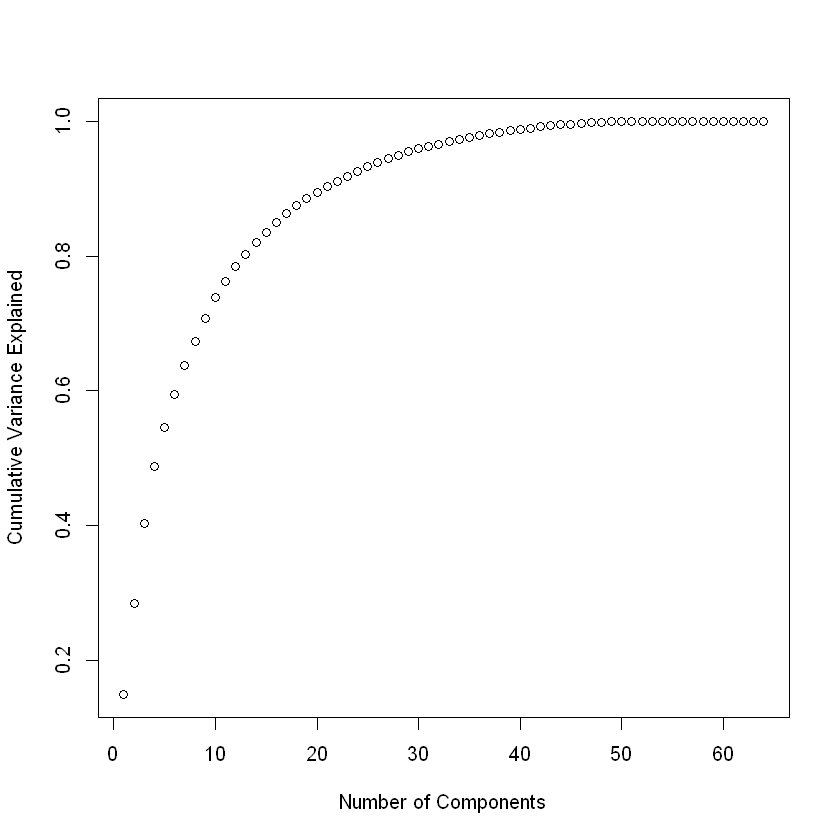

In [301]:
plot(pca.sum$importance[3,],
    xlab="Number of Components",
    ylab="Cumulative Variance Explained")

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
